In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from Evaluation import synthsonic, writetodict, plotter, plot_oversampling, evaluate_oversamplers
import smote_variants as sv
from sklearn.tree import DecisionTreeClassifier

In [44]:
# metrics 

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (recall_score, roc_auc_score, confusion_matrix, precision_score,
                             f1_score, confusion_matrix, balanced_accuracy_score, accuracy_score)


In [4]:
le = preprocessing.LabelEncoder()
random_state=4

_logger = logging.getLogger('smote_variants')
_logger.setLevel(logging.DEBUG)
_logger_ch = logging.StreamHandler()
_logger_ch.setFormatter(logging.Formatter(
    "%(asctime)s:%(levelname)s:%(message)s"))
_logger.addHandler(_logger_ch)

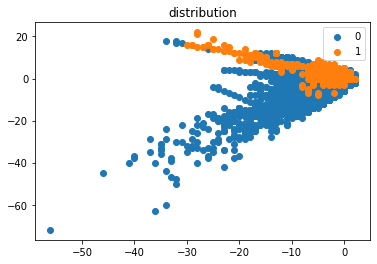

Counter({0: 284315, 1: 492})


In [5]:
# loading datasets

path = "/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/Datasets/"
data = path+"credit_fraud.csv"

data = pd.read_csv(data)

plotter(data.iloc[:,:-1].values,data.iloc[:,-1].values, "distribution")

data_dict = writetodict(data, 'credit_fraud')
X,y,name = data_dict['data'],data_dict['target'],data_dict['name']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = random_state)

In [7]:
clf = DecisionTreeClassifier(random_state=random_state)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [53]:
prediction = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

f_dict = {
    'title': "No SMOTE",
    'accuracy': accuracy_score(y_test, prediction),
    'balanced acc': balanced_accuracy_score(y_test,prediction),
    'precision': precision_score(y_test,prediction),
    'recall': recall_score(y_test,prediction),
    'roc_auc_score': roc_auc_score(y_test, proba),
    'f1_score': f1_score(y_test, prediction, average='binary'),
    'geometric mean': geometric_mean_score(y_test, prediction)
}

f_dict

{'title': 'No SMOTE',
 'accuracy': 0.9989679423750093,
 'balanced acc': 0.8670379021173686,
 'precision': 0.6506024096385542,
 'recall': 0.7346938775510204,
 'roc_auc_score': 0.8669785305426518,
 'f1_score': 0.6900958466453674,
 'geometric mean': 0.8568779276359437}

In [54]:
conf_nosmote = confusion_matrix(y_test,prediction)

In [16]:
result = pd.DataFrame(f_dict, index=[0])

In [17]:
result

,title,accuracy,balanced acc,precision,recall,roc_auc_score,f1_score,geometric mean
0,No SMOTE,0.998872,0.85001,0.624242,0.70068,0.849941,0.660256,0.83679


# analysis of plots

In [18]:
proportions = [0.1,0.3,0.5,0.7,0.9,1]

In [19]:
samples = []

for prop in proportions :
    o = synthsonic(proportion = prop,
                   random_state = random_state)
    
    print(prop)
    x_g, y_g = o.sample(X_train,y_train)
    
    f_dict = {
        'prop':prop,
        'x_sample':x_g,
        'y_sample':y_g
    }
    
    samples.append(f_dict)

2021-06-08 09:59:00,098:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BB3C050}")
2021-06-08 09:59:00,098:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BB3C050}")
2021-06-08 09:59:00,098:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BB3C050}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


0.1
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 846.31it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:02<00:00, 12.56it/s]
2021-06-08 09:59:21,254:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.3, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BF1B270}")
2021-06-08 09:59:21,254:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.3, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BF1B270}")
2021-06-08 09:59:21,254:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.3, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54BF1B270}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


0.3
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 969.05it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:03<00:00,  8.83it/s]
2021-06-08 09:59:44,062:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.5, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2380}")
2021-06-08 09:59:44,062:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.5, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2380}")
2021-06-08 09:59:44,062:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.5, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2380}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


0.5
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 959.13it/s]
Generating for node: 18: 100%|██████████| 29/29 [00:04<00:00,  7.08it/s]
2021-06-08 10:00:09,082:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.7, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5490}")
2021-06-08 10:00:09,082:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.7, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5490}")
2021-06-08 10:00:09,082:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.7, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5490}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


0.7
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 956.56it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:05<00:00,  5.64it/s]
2021-06-08 10:00:36,440:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.9, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2270}")
2021-06-08 10:00:36,440:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.9, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2270}")
2021-06-08 10:00:36,440:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.9, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E2270}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


0.9
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 936.79it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:05<00:00,  4.94it/s]
2021-06-08 10:01:04,481:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5380}")
2021-06-08 10:01:04,481:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5380}")
2021-06-08 10:01:04,481:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FC54B7E5380}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


1
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 915.85it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:06<00:00,  4.46it/s]


In [20]:
x0_synth, y0_synth = samples[0]['x_sample'], samples[0]['y_sample']
x1_synth, y1_synth = samples[1]['x_sample'], samples[1]['y_sample']
x2_synth, y2_synth = samples[2]['x_sample'], samples[2]['y_sample']
x3_synth, y3_synth = samples[3]['x_sample'], samples[3]['y_sample']
x4_synth, y4_synth = samples[4]['x_sample'], samples[4]['y_sample']
x5_synth, y5_synth = samples[5]['x_sample'], samples[5]['y_sample']

In [21]:
samples_smote = []

for prop in proportions :
    o = sv.SMOTE(proportion = prop,
                   random_state = random_state)
    
    print(prop)
    x_g, y_g = o.sample(X_train,y_train)
    
    f_dict = {
        'prop':prop,
        'x_sample':x_g,
        'y_sample':y_g
    }
    
    samples_smote.append(f_dict)

2021-06-08 10:01:33,625:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,625:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,625:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,733:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,733:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,733:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


0.1
0.3


2021-06-08 10:01:33,976:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,976:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:33,976:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


0.5


2021-06-08 10:01:34,334:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:34,334:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:34,334:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


0.7


2021-06-08 10:01:34,856:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:34,856:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:34,856:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


0.9


2021-06-08 10:01:35,508:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:35,508:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-08 10:01:35,508:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


1


In [22]:
x0_smote, y0_smote = samples_smote[0]['x_sample'], samples_smote[0]['y_sample']
x1_smote, y1_smote = samples_smote[1]['x_sample'], samples_smote[1]['y_sample']
x2_smote, y2_smote = samples_smote[2]['x_sample'], samples_smote[2]['y_sample']
x3_smote, y3_smote = samples_smote[3]['x_sample'], samples_smote[3]['y_sample']
x4_smote, y4_smote = samples_smote[4]['x_sample'], samples_smote[4]['y_sample']
x5_smote, y5_smote = samples_smote[5]['x_sample'], samples_smote[5]['y_sample']

In [23]:
def pca_plot(X,y) :
    
    x = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    fig = plt.figure(figsize = (12,7))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'2 component PCA')

    counter = Counter(y)

    for label, _ in counter.items() :
        rowix = np.where(y == label)[0]
        ax.scatter(principalComponents[rowix, 0], principalComponents[rowix, 1], label=str(label))

    ax.legend()

    fig.show()
    print(counter)

Counter({0: 190475, 1: 19358})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:0.1 ratio)')

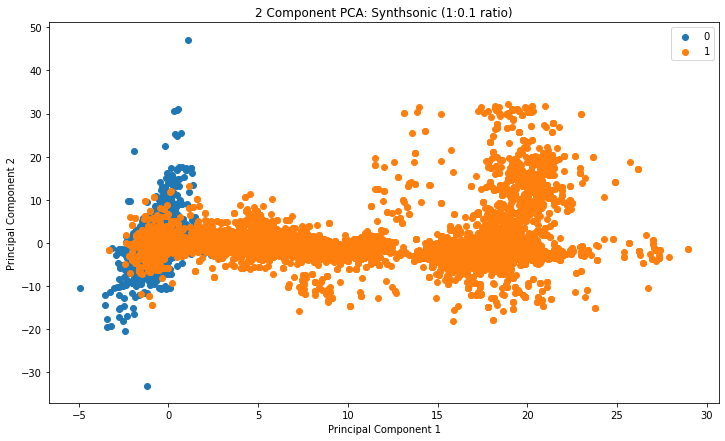

In [24]:
pca_plot(x0_synth,y0_synth)
plt.title("2 Component PCA: Synthsonic (1:0.1 ratio)")

Counter({0: 190475, 1: 57384})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:0.3 ratio)')

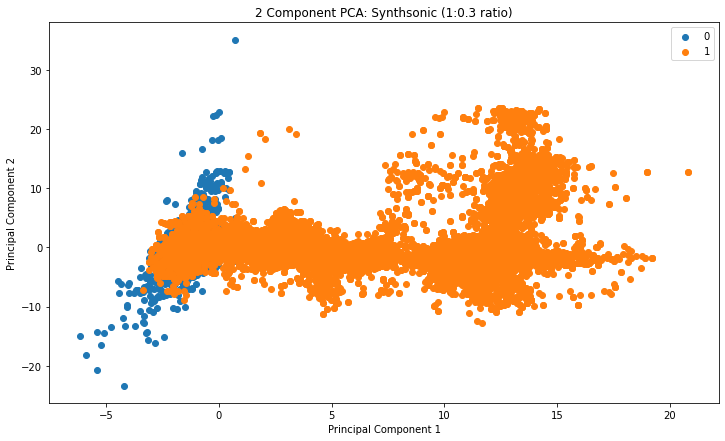

In [25]:
pca_plot(x1_synth,y1_synth)
plt.title("2 Component PCA: Synthsonic (1:0.3 ratio)")

Counter({0: 190475, 1: 95410})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:0.5 ratio)')

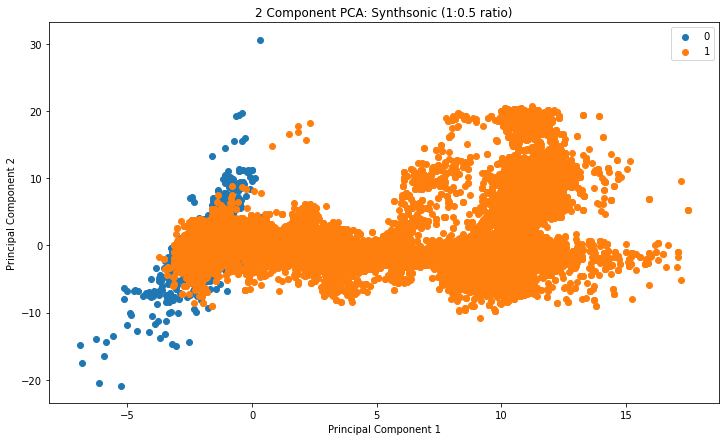

In [26]:
pca_plot(x2_synth,y2_synth)
plt.title("2 Component PCA: Synthsonic (1:0.5 ratio)")

Counter({0: 190475, 1: 133436})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:0.7 ratio)')

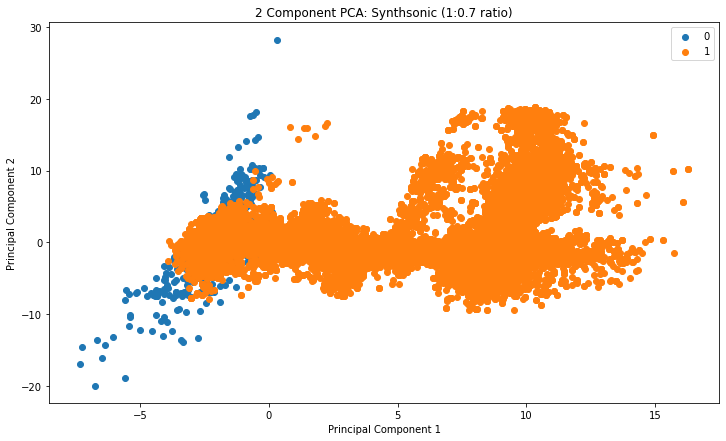

In [27]:
pca_plot(x3_synth,y3_synth)
plt.title("2 Component PCA: Synthsonic (1:0.7 ratio)")

Counter({0: 190475, 1: 171462})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:0.9 ratio)')

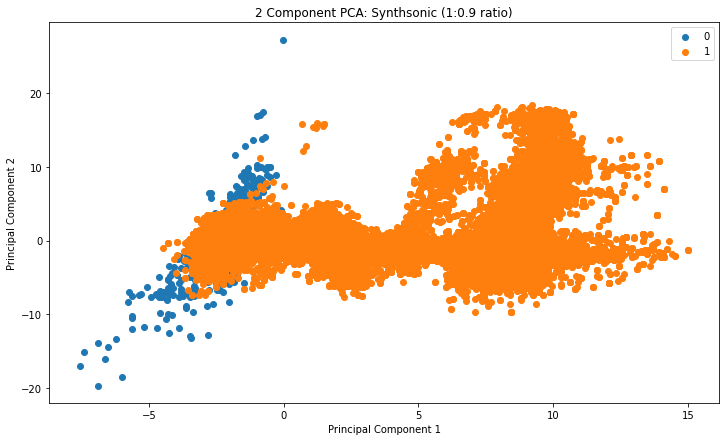

In [28]:
pca_plot(x4_synth,y4_synth)
plt.title("2 Component PCA: Synthsonic (1:0.9 ratio)")

Counter({0: 190475, 1: 190475})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: Synthsonic (1:1 ratio)')

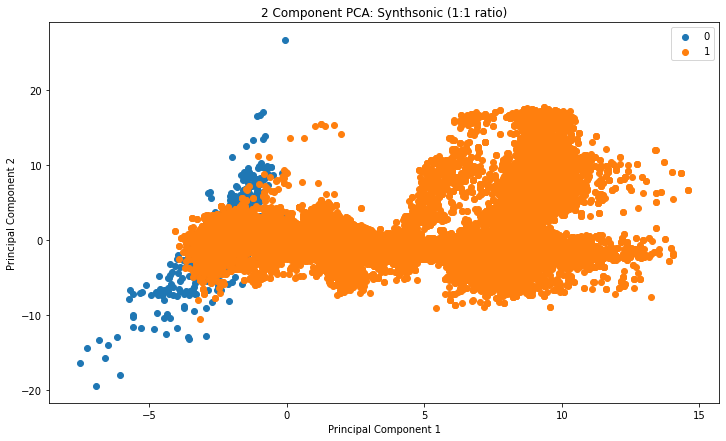

In [29]:
pca_plot(x5_synth,y5_synth)
plt.title("2 Component PCA: Synthsonic (1:1 ratio)")

Counter({0: 190475, 1: 19358})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE')

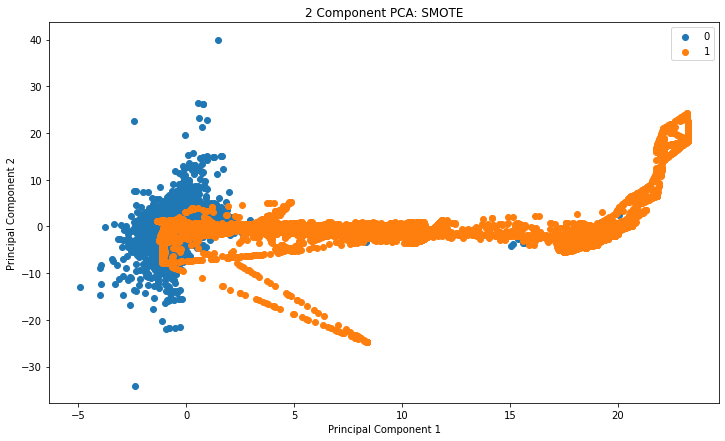

In [96]:
pca_plot(x0_smote,y0_smote)
plt.title("2 Component PCA: SMOTE")

Counter({0: 190475, 1: 57384})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE')

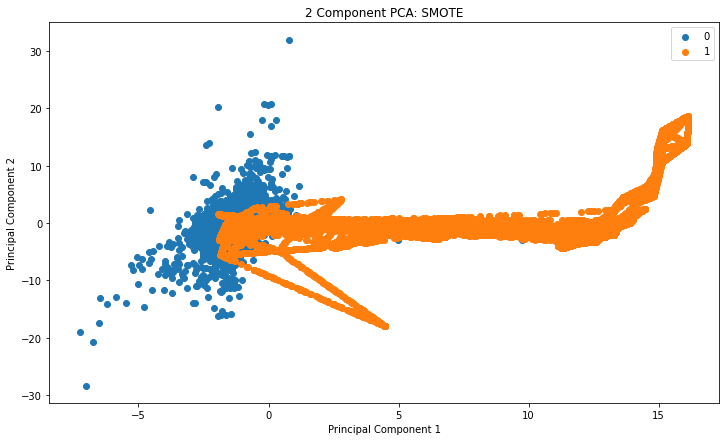

In [97]:
pca_plot(x1_smote,y1_smote)
plt.title("2 Component PCA: SMOTE")

Counter({0: 190475, 1: 95410})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE')

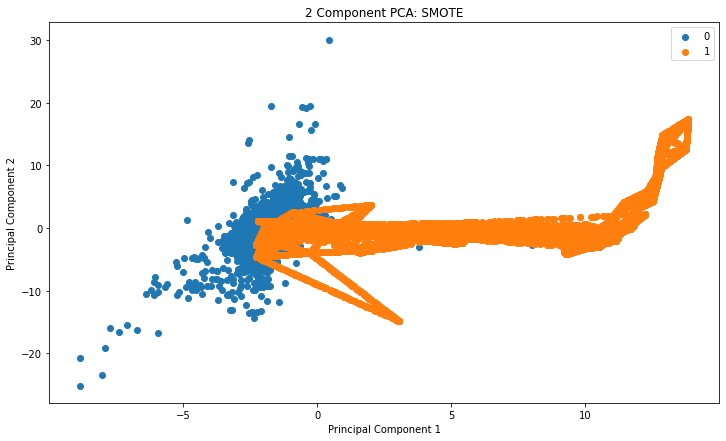

In [98]:
pca_plot(x2_smote,y2_smote)
plt.title("2 Component PCA: SMOTE")

Counter({0: 190475, 1: 133436})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE')

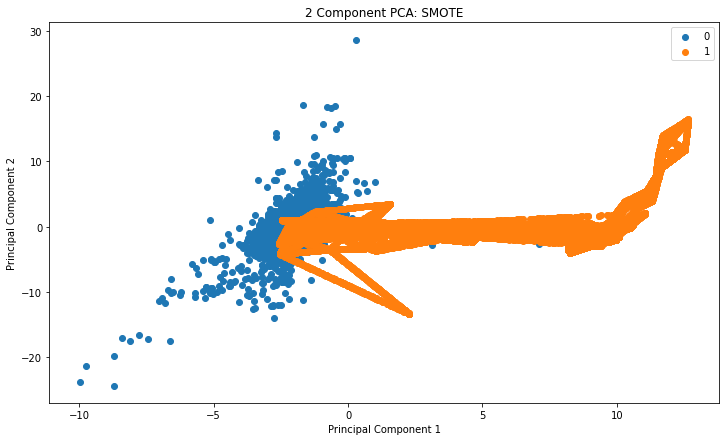

In [99]:
pca_plot(x3_smote,y3_smote)
plt.title("2 Component PCA: SMOTE")

Counter({0: 190475, 1: 171462})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE')

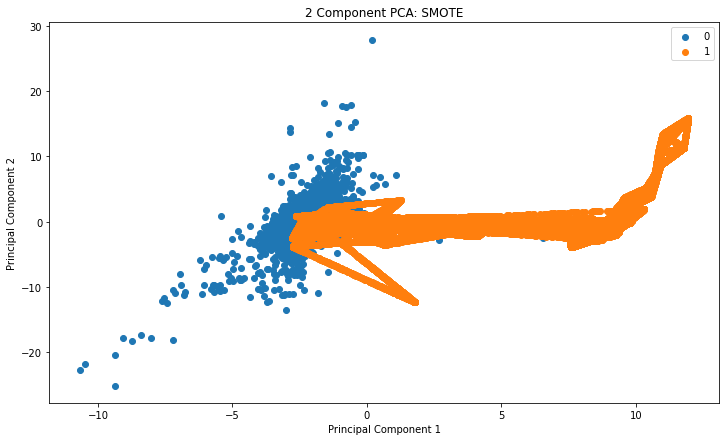

In [100]:
pca_plot(x4_smote,y4_smote)
plt.title("2 Component PCA: SMOTE")

Counter({0: 190475, 1: 190475})


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '2 Component PCA: SMOTE (1:1 ratio)')

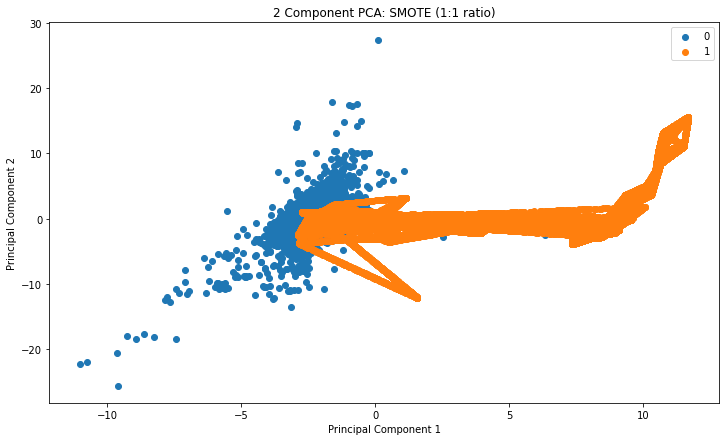

In [30]:
pca_plot(x5_smote,y5_smote)
plt.title("2 Component PCA: SMOTE (1:1 ratio)")

# Evaluation of oversamplers

In [31]:
proportions = [0.1,0.3,0.5,0.7,0.9,1]
xs_synth = [x0_synth,x1_synth,x2_synth,x3_synth,x4_synth,x5_synth]
ys_synth = [y0_synth,y1_synth,y2_synth,y3_synth,y4_synth,y5_synth]

In [37]:
clf = DecisionTreeClassifier(random_state=random_state)

res = []

for prop,data,target in zip(proportions,xs_synth,ys_synth) :
    
    clf.fit(data,target)
    
    prediction = clf.predict(X_test)
    proba = clf.predict_proba(X_test)[:,1]
    
    f_dict = {
    'proportion':prop,
    'clf_score': clf.score(X_test,y_test),
    'accuracy': accuracy_score(y_test, prediction),
    'balanced acc': balanced_accuracy_score(y_test,prediction),
    'recall': recall_score(y_test,prediction),
    'roc_auc_score': roc_auc_score(y_test, proba),
    'f1_score': f1_score(y_test, prediction, average='binary'),
    'geometric mean': geometric_mean_score(y_test, prediction)
    }

    res.append(f_dict)
    
resultdf = pd.DataFrame(res)
resultdf

,proportion,clf_score,accuracy,balanced acc,recall,roc_auc_score,f1_score,geometric mean
0,0.1,0.999032,0.999032,0.870466,0.741497,0.870405,0.705502,0.860859
1,0.3,0.998893,0.998893,0.856813,0.714286,0.856746,0.668790,0.844875
2,0.5,0.999074,0.999074,0.856903,0.714286,0.856841,0.707071,0.844952
3,0.7,0.998957,0.998957,0.867033,0.734694,0.866972,0.687898,0.856873
4,0.9,0.998968,0.998968,0.877226,0.755102,0.877172,0.695925,0.868684
5,1.0,0.998968,0.998968,0.867038,0.734694,0.866979,0.690096,0.856878


In [123]:
clf.score(X_train,y_train)

0.999973797295881

In [57]:
clf = DecisionTreeClassifier(random_state=random_state)

clf.fit(x5_synth,y5_synth)

prediction = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

conf_synth = confusion_matrix(y_test, prediction)

# eval smote

In [42]:
proportions = [0.1,0.3,0.5,0.7,0.9,1]
xs_smote = [x0_smote,x1_smote,x2_smote,x3_smote,x4_smote,x5_smote]
ys_smote = [y0_smote,y1_smote,y2_smote,y3_smote,y4_smote,y5_smote]

In [43]:
clf = DecisionTreeClassifier(random_state=random_state)

res = []

for prop,data,target in zip(proportions,xs_smote,ys_smote) :
    
    clf.fit(data,target)
    
    prediction = clf.predict(X_test)
    proba = clf.predict_proba(X_test)[:,1]
    
    f_dict = {
    'proportion':prop,
    'clf_score': clf.score(X_test,y_test),
    'accuracy': accuracy_score(y_test, prediction),
    'balanced acc': balanced_accuracy_score(y_test,prediction),
    'recall': recall_score(y_test,prediction),
    'roc_auc_score': roc_auc_score(y_test, proba),
    'f1_score': f1_score(y_test, prediction, average='binary'),
    'geometric mean': geometric_mean_score(y_test, prediction)
    }

    res.append(f_dict)
    
result_smote = pd.DataFrame(res)
result_smote

,proportion,clf_score,accuracy,balanced acc,recall,roc_auc_score,f1_score,geometric mean
0,0.1,0.998915,0.998915,0.870407,0.741497,0.870348,0.681250,0.860808
1,0.3,0.999042,0.999042,0.856887,0.714286,0.856819,0.700000,0.844938
2,0.5,0.998936,0.998936,0.870418,0.741497,0.870357,0.685535,0.860817
3,0.7,0.998989,0.998989,0.846672,0.693878,0.846602,0.682274,0.832771
4,0.9,0.998904,0.998904,0.846630,0.693878,0.846558,0.664495,0.832736
5,1.0,0.998787,0.998787,0.843175,0.687075,0.843103,0.639241,0.828599


In [58]:
clf.fit(x5_smote,y5_smote)
prediction=clf.predict(X_test)

conf_smote = confusion_matrix(y_test, prediction)

# results

In [56]:
# No smote
print(conf_nosmote)

result

[[93782    58]
 [   39   108]]


,title,accuracy,balanced acc,precision,recall,roc_auc_score,f1_score,geometric mean
0,No SMOTE,0.998872,0.85001,0.624242,0.70068,0.849941,0.660256,0.83679


In [61]:
# synthsonic
print(conf_synth)

resultdf

[[93782    58]
 [   39   108]]


,proportion,clf_score,accuracy,balanced acc,recall,roc_auc_score,f1_score,geometric mean
0,0.1,0.999032,0.999032,0.870466,0.741497,0.870405,0.705502,0.860859
1,0.3,0.998893,0.998893,0.856813,0.714286,0.856746,0.668790,0.844875
2,0.5,0.999074,0.999074,0.856903,0.714286,0.856841,0.707071,0.844952
3,0.7,0.998957,0.998957,0.867033,0.734694,0.866972,0.687898,0.856873
4,0.9,0.998968,0.998968,0.877226,0.755102,0.877172,0.695925,0.868684
5,1.0,0.998968,0.998968,0.867038,0.734694,0.866979,0.690096,0.856878


In [60]:
# SMOTE 
print(conf_smote)

result_smote

[[93772    68]
 [   46   101]]


,proportion,clf_score,accuracy,balanced acc,recall,roc_auc_score,f1_score,geometric mean
0,0.1,0.998915,0.998915,0.870407,0.741497,0.870348,0.681250,0.860808
1,0.3,0.999042,0.999042,0.856887,0.714286,0.856819,0.700000,0.844938
2,0.5,0.998936,0.998936,0.870418,0.741497,0.870357,0.685535,0.860817
3,0.7,0.998989,0.998989,0.846672,0.693878,0.846602,0.682274,0.832771
4,0.9,0.998904,0.998904,0.846630,0.693878,0.846558,0.664495,0.832736
5,1.0,0.998787,0.998787,0.843175,0.687075,0.843103,0.639241,0.828599
